In [74]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [76]:
# Carregar o conjunto de dados Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar as imagens (escala de 0 a 1, dividindo por 255 que seria o numero maximo, ficando cor cinza)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verificar as dimensões do conjunto de treinamento
print("x_train.shape:", x_train.shape)


x_train.shape: (60000, 28, 28)


In [77]:
import numpy as np

# Expandir a dimensão para adicionar o canal (1 para escala de cinza)
x_train = np.expand_dims(x_train, -1)  
x_test = np.expand_dims(x_test, -1)    

# Verificar as novas formas das imagens
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)


x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


In [80]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [82]:
# Construir o modelo com a API funcional
i = Input(shape=x_train[0].shape)  # Entrada com shape das imagens (28, 28, 1)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Criar o modelo
model = Model(i, x)

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7489 - loss: 0.6885 - val_accuracy: 0.8556 - val_loss: 0.3970
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8601 - loss: 0.3694 - val_accuracy: 0.8710 - val_loss: 0.3434
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8821 - loss: 0.3137 - val_accuracy: 0.8778 - val_loss: 0.3290
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8966 - loss: 0.2734 - val_accuracy: 0.8824 - val_loss: 0.3072
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9081 - loss: 0.2467 - val_accuracy: 0.8909 - val_loss: 0.2883
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9153 - loss: 0.2256 - val_accuracy: 0.8910 - val_loss: 0.3006
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9207 - loss: 0.2060 - val_accuracy: 0.8988 - val_loss: 0.2902
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9273 - loss: 0.1926 

In [85]:
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)


x_train.shape: (60000, 28, 28, 1)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28, 1)
y_test.shape: (10000,)


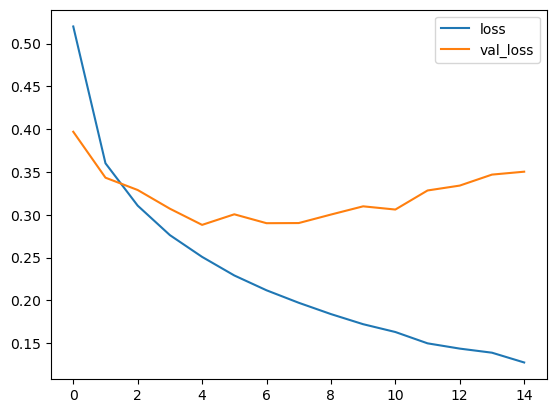

In [88]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

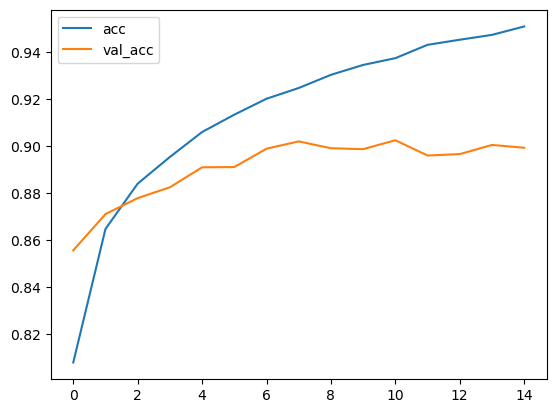

In [90]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[888   1  24  17   4   2  56   0   8   0]
 [  2 977   1  14   3   0   0   0   3   0]
 [ 16   0 885   8  45   0  46   0   0   0]
 [ 18   5  14 902  31   2  28   0   0   0]
 [  0   1  67  28 844   0  57   0   3   0]
 [  0   0   0   0   0 976   1  17   0   6]
 [145   0  88  26  96   0 631   0  14   0]
 [  0   0   0   0   0  16   0 958   0  26]
 [  2   1   8   1   5   2   4   3 974   0]
 [  1   0   0   0   0   5   0  36   1 957]]


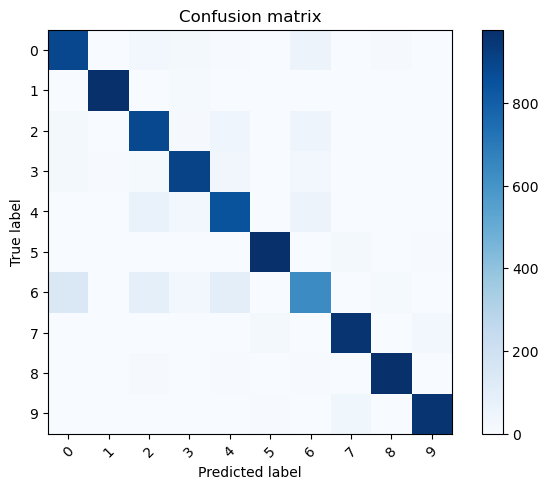

In [92]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normaliza a matriz dividindo cada linha pela soma
        print("Normalized confusion matrix")  # Informa que a matriz foi normalizada
    else:
        print('Confusion matrix, without normalization')  # Informa que a matriz não foi normalizada

    print(cm)  # Exibe a matriz de confusão no terminal

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Plota a matriz de confusão com a cor definida por cmap
    plt.title(title)  # Define o título do gráfico
    plt.colorbar()  # Adiciona a barra de cores ao lado da matriz
    tick_marks = np.arange(len(classes))  # Cria os ticks para as classes no eixo x e y
    plt.xticks(tick_marks, classes, rotation=45)  # Rotaciona e define os rótulos do eixo x
    plt.yticks(tick_marks, classes)  # Define os rótulos do eixo y

    plt.tight_layout()  # Ajusta o layout do gráfico para não cortar nada
    plt.ylabel('True label')  # Rótulo do eixo y (rótulos reais)
    plt.xlabel('Predicted label')  # Rótulo do eixo x (rótulos previstos)
    plt.show()  # Exibe o gráfico

p_test = model.predict(x_test).argmax(axis=1)  # Realiza as previsões do modelo e escolhe a classe com maior probabilidade
cm = confusion_matrix(y_test, p_test)  # Cria a matriz de confusão comparando as previsões com os valores reais
plot_confusion_matrix(cm, list(range(10)))  # Plota a matriz de confusão para as 10 classes (presumivelmente de 0 a 9)


In [96]:
labels = "T-shirt/top Trouser Pulloveer Dress Coat Sandal Shirt Sneaker Bag Ankle boot".split()


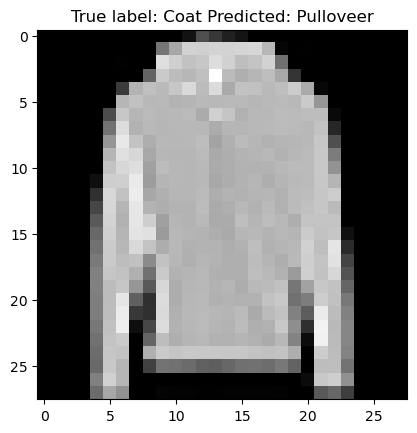

In [101]:
misclassified_idx = np.where(p_test != y_test)[0]  # Encontra os índices onde as previsões (p_test) são diferentes dos rótulos reais (y_test)
i = np.random.choice(misclassified_idx)  # Escolhe aleatoriamente um dos índices onde a previsão foi incorreta
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")  # Plota a imagem do teste com índice 'i', reorganizando-a para o formato 28x28 e em escala de cinza
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))  # Define o título do gráfico com o rótulo verdadeiro e o previsto, acessando as classes a partir da lista 'labels'
plt.show()  # Exibe o gráfico
